MethodError: MethodError: no method matching StudentTProcessEP(::Adjoint{Float64, Matrix{Float64}}, ::Vector{Float64}, ::Float64, ::var"#88#89", ::Float64)
The type `StudentTProcessEP` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  StudentTProcessEP(::Any, ::Any, ::Any, ::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any)
   @ Main ~/ws/RR.jl/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sdnNjb2RlLXJlbW90ZQ==.jl:51
  StudentTProcessEP(!Matched::Matrix{Float64}, ::Vector{Float64}, ::Float64, ::Function, ::Float64, !Matched::Vector{Float64}, !Matched::Vector{Float64}, !Matched::Vector{Float64}, !Matched::Matrix{Float64}, !Matched::Matrix{Float64})
   @ Main ~/ws/RR.jl/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sdnNjb2RlLXJlbW90ZQ==.jl:51
  StudentTProcessEP(!Matched::Matrix{Float64}, ::Vector{Float64}, ::Float64, ::Function, ::Float64)
   @ Main ~/ws/RR.jl/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sdnNjb2RlLXJlbW90ZQ==.jl:63


Generating 2D 'Two Moons' sample data...
Initializing and fitting the Student-t Process model...
Plotting 2D results...


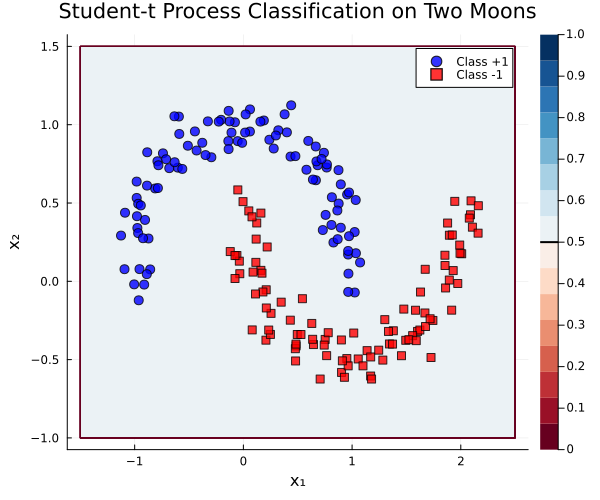

In [13]:
# 2次元の "Two Moons" データセットを生成するヘルパー関数
function generate_moons_data(n_per_class::Int, noise::Float64)
    Random.seed!(42) # 再現性のため
    # 上側の月
    t1 = range(0, π, length=n_per_class)
    X1 = hcat(cos.(t1), sin.(t1)) .+ noise .* randn(n_per_class, 2)
    y1 = fill(1.0, n_per_class)

    # 下側の月
    t2 = range(0, π, length=n_per_class)
    X2 = hcat(1 .- cos.(t2), 0.5 .- sin.(t2)) .+ noise .* randn(n_per_class, 2)
    y2 = fill(-1.0, n_per_class)

    X = [X1; X2]
    y = [y1; y2]
    
    return X, y
end


# 1. データの生成
println("Generating 2D 'Two Moons' sample data...")
X_train, y_train = generate_moons_data(100, 0.1)


# 2. モデルの初期化と学習
println("Initializing and fitting the Student-t Process model...")
# カーネルの長さスケールlはデータに合わせて調整します。0.4あたりが良好です。
ep_moons = StudentTProcessEP(X_train, y_train, 10.0, (x1,x2)->rbf_kernel(x1,x2; l=0.4), 1e-3)
fit!(ep_moons, 20)


# 3. 2次元の可視化
println("Plotting 2D results...")

# 予測用の2次元グリッドを作成
x_range = -1.5:0.05:2.5
y_range = -1.0:0.05:1.5
grid_x = [x for x in x_range for y in y_range]
grid_y = [y for x in x_range for y in y_range]
X_test = hcat(grid_x, grid_y)

# グリッド上の各点で予測確率を計算
π_star = predict_proba(ep_moons, X_test)
# 予測結果をグリッドの形状に変換
Z = reshape(π_star, length(y_range), length(x_range))

# 3-1. 予測確率の等高線塗りつぶし
contourf(
    x_range,                  # x 座標
    y_range,                  # y 座標
    Z;                        # 予測確率
    c = :RdBu,                # カラーマップ（赤⇔青）
    clims = (0, 1),           # カラースケールを 0–1 に固定
    xlabel = "x₁",
    ylabel = "x₂",
    title = "Student-t Process Classification on Two Moons",
    legend = :topright,
    size = (600, 500)
)

# 3-2. 決定境界 (π = 0.5) を太線で重ねる
contour!(
    x_range, y_range, Z;
    levels = [0.5],           # π=0.5 の線だけ描画
    linewidth = 2,
    color = :black,
    label = "Decision Boundary"
)

# 3-3. 学習データをクラスごとにプロット
idx_pos = findall(y_train .==  1.0)
idx_neg = findall(y_train .== -1.0)

scatter!(
    X_train[idx_pos, 1], X_train[idx_pos, 2];
    marker = (:circ, 5, 0.8, :blue, stroke(1, :black)), # 青丸
    label = "Class +1"
)

scatter!(
    X_train[idx_neg, 1], X_train[idx_neg, 2];
    marker = (:square, 4, 0.8, :red, stroke(1, :black)), # 赤四角
    label = "Class -1"
)

In [14]:
predict(ep_moons, X_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

4131-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0